In [3]:
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup #for cleaning html
import pickle as pkl
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrikritisingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_json('Coflein_Export2.json')

In [3]:
data.head()

,row_0,row_1,row_2,row_3,row_4,row_5,row_6,row_7,row_8,row_9,...,row_119709,row_119710,row_119711,row_119712,row_119713,row_119714,row_119715,row_119716,row_119717,row_119718
resourceinstance,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...
tiles,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...,[{'data': {'0b5446f8-a00c-11ea-a530-000d3a86d7...,[{'data': {'60120f58-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f61-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f58-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f43-9ff2-11ea-a530-000d3a86d7...,[{'data': {'0b5446f8-a00c-11ea-a530-000d3a86d7...,...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...


In [4]:
tdata = data.T

In [5]:
tdata.head()

,resourceinstance,tiles
row_0,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
row_1,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
row_2,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'0b5446f8-a00c-11ea-a530-000d3a86d7...
row_3,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f58-9ff2-11ea-a530-000d3a86d7...
row_4,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f61-9ff2-11ea-a530-000d3a86d7...


In [15]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119719 entries, row_0 to row_119718
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   resourceinstance  119719 non-null  object
 1   tiles             119719 non-null  object
dtypes: object(2)
memory usage: 6.8+ MB


In [21]:
tdata.resourceinstance['row_0']

{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86d704',
 'legacyid': '416697',
 'resourceinstanceid': '1bbac7f4-6d70-4a6c-b0dc-e851e8720e9f'}

In [27]:
tdata.reset_index()

,index,resourceinstance,tiles
0,row_0,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
1,row_1,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
2,row_2,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'0b5446f8-a00c-11ea-a530-000d3a86d7...
3,row_3,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f58-9ff2-11ea-a530-000d3a86d7...
4,row_4,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f61-9ff2-11ea-a530-000d3a86d7...
...,...,...,...
119714,row_119714,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f4f-9ff2-11ea-a530-000d3a86d7...
119715,row_119715,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...
119716,row_119716,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...
119717,row_119717,{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86...,[{'data': {'60120f4c-9ff2-11ea-a530-000d3a86d7...


In [29]:
tdata.columns

Index(['resourceinstance', 'tiles'], dtype='object')

In [32]:
tdata.tiles[0:3]

row_0    [{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
row_1    [{'data': {'60120f6e-9ff2-11ea-a530-000d3a86d7...
row_2    [{'data': {'0b5446f8-a00c-11ea-a530-000d3a86d7...
Name: tiles, dtype: object

In [10]:
a = tdata.tiles['row_1']

The Caerphilly Palace opened in 1904 initially as a skating rink. The building was sold in 1910 to George H. Pitt who converted the Palace into Pitt's Picture Palace with seating for 1,500 people. The conversion work was carried out by Mr W. Branch of Abersychan with electric installations by Messr Crossley of Cardiff.

The Palace used to run variety turns in between films and proved successful. The business changed ownership several times over the next few years and the showing of films and plays ceased around the time talkies emerged with the building then becoming unused for many years. A local company, Ryans, used the building to store vehicles for a while before it being demolished in 1976.

Meilyr Powel, RCAHMW, November 2020

Source:

'Entertaining South Wales - C', overthefootlights.co.uk, pp.3-4

In [47]:
for b in a[0]['data'].values():
    print(b)

<p>From &#39;Entertaining South Wales&#39;:</p>

<p>&#39;The independent Plaza Cinema opened in North Road on March 12th 1928 with 1,500 seats. The opening film was Norma Talmadge in the (silent) version of &ldquo;Camille&rdquo;. The film was accompanied by a large in-house orchestra - a standard feature of many larger cinemas, though this was something that would mostly disappear due to manpower shortages during the Great War. Over the course of its more than fifty-year existence it was taken over by the Cardiff Cinema Circuit and then the Jackson Withers Circuit, and ultimately bought by the Rank Organisation. The cinema closed on October 17th 1981 with a horror double-bill of &ldquo;Alien&rdquo; and &ldquo;The Fog&rdquo;. The building remained unused for several years before it was finally demolished and replaced with Meridian Court, a sheltered housing development.&#39;</p>

<p>&nbsp;</p>

<p>Meilyr Powel, RCAHMW, November 2020</p>

<p>Source:</p>

<p><a href="http://www.overthefoo

In [92]:
df = []
reExp = "':\s+[\"\']([\W\w]+?)[\"\'],"
for i in range(0, 15):
    key = str(tdata.resourceinstance[i]['graph_id']).replace('-', '\-')
    print(tdata.resourceinstance[i])
    print(key)
    currRegExp = "\'" + key + reExp
    print(currRegExp)
    x = re.findall(str(tdata.tiles[i]), a)
    df.append(x)

{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86d704', 'legacyid': '416697', 'resourceinstanceid': '1bbac7f4-6d70-4a6c-b0dc-e851e8720e9f'}
60120f3c\-9ff2\-11ea\-a530\-000d3a86d704
'60120f3c\-9ff2\-11ea\-a530\-000d3a86d704':\s+["']([\W\w]+?)["'],


error: bad character range e-9 at position 19

In [97]:
df = []

In [99]:
df.append("<p>The Caerphilly Palace opened in 1904 initially as a skating rink. The building was sold in 1910 to George H. Pitt who converted the Palace into Pitt&#39;s Picture Palace with seating for 1,500 people. The conversion work was carried out by Mr&nbsp;W. Branch of Abersychan with electric installations by Messr Crossley of Cardiff.</p>\\n\\n<p>The Palace used to run variety turns in between films and proved successful. The business changed ownership several times over the next few years and the showing of films and plays ceased around the time talkies emerged with&nbsp;the building then becoming&nbsp;unused for many years. A local company, Ryans, used the building to store vehicles for a while before it being demolished in 1976.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Meilyr Powel, RCAHMW, November 2020</p>\\n\\n<p>Source:</p>\\n\\n<p><a href=\"http://www.overthefootlights.co.uk/Entertaining%20South%20Wales%20C.pdf\">&#39;Entertaining South Wales - C&#39;, overthefootlights.co.uk, pp.3-4</a></p>\\n")

In [101]:
df.append("<p>From &#39;Entertaining South Wales&#39;:</p>\\n\\n<p>&#39;The independent Plaza Cinema opened in North Road on March 12th 1928 with 1,500 seats. The opening film was Norma Talmadge in the (silent) version of &ldquo;Camille&rdquo;. The film was accompanied by a large in-house orchestra - a standard feature of many larger cinemas, though this was something that would mostly disappear due to manpower shortages during the Great War. Over the course of its more than fifty-year existence it was taken over by the Cardiff Cinema Circuit and then the Jackson Withers Circuit, and ultimately bought by the Rank Organisation. The cinema closed on October 17th 1981 with a horror double-bill of &ldquo;Alien&rdquo; and &ldquo;The Fog&rdquo;. The building remained unused for several years before it was finally demolished and replaced with Meridian Court, a sheltered housing development.&#39;</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Meilyr Powel, RCAHMW, November 2020</p>\\n\\n<p>Source:</p>\\n\\n<p><a href=\"http://www.overthefootlights.co.uk/Entertaining%20South%20Wales%20C.pdf\">&#39;Entertaining South Wales - C&#39;, overthefootlights.co.uk, p.32</a></p>\\n")

In [103]:
df.append("Usk Castle is a substantial masonry castle dating from around 1138 and now generally ruinous.   It is first recorded in the possession of Richard de Clare in 1262, but probably held by the de Clare family from the conquest of South Wales. It subsequently passed through severeal hands in the fourteenth century and for a time was controlled by Edmund Mortimer, Earl of the Marches. After the death of his nephew Richard, the Duke of York, it passed to Edward VI, subsequently staying in the hands of the crown until the death of Henry VII. It then passed to the Earls of Pembroke.<br>\n<br>\nThe castle stands on a spur overlooking the Usk and consists of a rectangular area surrounded by curtain walls with towers at intervals and a large gatehouse on the east side. To the south-east is an outer bailey with walls on its south-east side, a corner tower on the south, and a gatehouse at the north end of the south-east wall.<br>\n<br>\nThe gatehouse is square in plan, a three storey structure with a doorway reached by stone steps on the east side and round headed windows on the south side. Internally there is a fireplace on the north-west side, and a number of doorways at different levels. <br>\nThe north tower is D-shaped with a large square-headed doorway with a square mullioned window above on the inside wall, and external doorways in the north and south walls, that to the south leading to a small platform. On the first floor is a fireplace. <br>\nThe banqueting hall is 14th century in date, being altered around 1500. It stands against the curtain wall on the north side. Along its south side is a buttressed wall with two windows and a doorway, with a third window above. The west wall has a further, large window and there is a fireplace in the north wall at first floor level. The Garrison Tower is circular and located midway along the south-west curtain wall. It stands to its full height with a crenallated parapet, and there are doors into it on either side of the curtain wall. At a level corresponding to the top of the curtain wall is a small passageway leading to a garderobe on the north side and a spiral staircase on the south side, and there are small slit windows on four levels.<br>\n<br>\nThe Round Tower in the south corner, stands to the same height as the curtain wall, with a doorway surviving on the north side.<br>\nCurtain walls survive to various heights. On the north-east side there is a large gateway with a pointed arch, to the west of which is a low grass bank.  Above this are three supports in the wall for the first floor of the building that was there. There is also a tapering fireplace in the middle. To the north of the gateway is another fireplace and grass covered low remains of rooms, and to the north of this is a small projection with a rounded niche. The north side has St Georges chapel, an area of garden made into an open air chapel. At the west end a small tower projects to the outside of the curtain wall, internally having a fireplace and the remains of a spiral staircase.  The south-west curtain wall retains its wall walk, and there are three openings, one of which has a pillar and appears more recent. The south-east wall has a small 'room' inside the wall at an upper level.<br>\nThe Dovecot tower is at the south end of the outer bailey wall; it is round in plan and stands to its full height. The internal north-west wall has niches for use as dove boxes.<br>\n(Source SAM description)<br>\n<br>\nS Fielding, RCAHMW, 20 June 2005<br>\n")

In [105]:
df.append("Gwndwn Baptist Chapel was built in 1910, in an unclassified architecural style, with a gable entry plan and flat-headed windows. This chapel was greatly altered in a late twentieth century conversion for residential use.<br>\n<br>\nRCAHMW, May 2011. Built 1910. Unclassified architecural style, has been greatly altered. Status (1998): in other use ; residential  Converted to a residence; part or whole rebuilding. (OJ 23/08/96).'")

In [108]:
df.append("<p>The church of St Meilig retains some 13th-14th century fabric in the tower, but was largely rebuilt by W.J. and A.H. Worthington of London in 1853-55 at the cost of &pound;943 using mixed local stones, with Bath stone dressings.</p>\n\n<p>The nave has a south porch, the chancel has a vestry on the north side, and a west tower. The porch is in early Decorated style.&nbsp;</p>\n\n<p>The tower is of 3 stages, the top stage rebuilt in the 19th century. Two phases of early slit windows, all now blocked, and a crenellated parapet.&nbsp;</p>\n\n<p>The nave of 4 bays has an impressive open roof on orch-braced collar beam trusses springing from wall corbels. &nbsp;The chancel has an open trussed rafter roof with scissor braces and a deep oak cornice pierced with trefoils. The floor is paved with tiles.</p>\n\n<p>The limestone pulpit is octagonal, approached by 6 steps with carved oak handrail on twisted iron supports. The 19th century font is an octagonal bowl carved with ballflowers, fleurons and chequer panels, all raised on four clustered columns. The earlier, 13th century font is a simple round bowl with a horizontal flat central cordon, now bound with iron, on a tapered base. The organ of 1880, was restored by Henry James, London. At the west end is an important 11th century cross slab said originally to have stood at Croes feilig and set up in the churchyard in the 12th century (see NPRN 96531).</p>\n\n<p>There is an east window in memorial to Henry Beavan, the family who brought the church restoration to fruition. On the south side, a window with Christ with children, dedicated to William Elmslie, &dagger; c.1853 in China; Christ walking on waters, commemorating Captain R.Collinson&#39;s survival of the arctic expedition of the ship Enterprise. On the north side a window in memorial to Octavia Ramsey of Maesllwch Castle, &dagger;1850.</p>\n\n<p>There are various wall monuments, including many from the previous church, reset after the rebuilding. In chancel, limestone Gothic aedicule, c.1870 to Hugh Beavan of Brynrhydd House, &dagger;1837; white marble sarcophagus relief on black ground, by I.E.Thomas of London, to John Pugh of Porthgoley, &dagger;1824; draped casket over white marble tablet set against veined marble, also by I.E.Thomas, to Ann Pugh of Porthgoley, &dagger;1846; Gothic surround to marble tablet to John Pugh of Gare (Gaer), &dagger;1788;&nbsp; white marble on grey, to Ann Gunter and William of Abergavenny &dagger;1805 and 1808 (descendants of Sir Peter Gunter of Tregunter). There is also a Great War tablet. Against the west wall, a canvas Royal Arms of George III.</p>\n\n<p>The dedication to Meilig indicates an early origin. Meilig, abbott and confessor, was the son of Caw of Pictland and brother to the monk Gildas. He was born on Clydeside c. 650 and is mentioned in the C10 Culhwch and Olwen story, and in the Book of Llan Daf, [Liber Llandavensis], compiled c.1120-40.</p>\n\n<p>Source: Cadw Listing description.</p>\n\n<p>RCAHMW, 2021.</p>\n")

In [110]:
df.append("<p>This record comprises a documentary reference to a shipping casualty which has been assigned to the maritime named location OFF THE SMALLS pending more information which may allow a more precise location for the loss to be assigned.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Event and Historical Information:</p>\\n\\n<p>The EMILY ELIZA was a 144 net ton wooden brigantine. At time of loss on 7 September 1898, the vessel was on voyage from Portsmouth to Manchester with a cargo of whitening when she struck a rock near the Smalls and became wrecked. The crew were picked up by the steamship FOREST, from Almeria.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Sources include:</p>\\n\\n<p><a href=\"https://archive.org/stream/HECCR1890/1898#page/n34/mode/1up\">Lloyd&#39;s Register Casualty Returns, 1 July - 30 September 1898, p.10 (h)</a><br />\\n<a href=\"https://newspapers.library.wales/view/3740967/3740975/199/Emily%20Eliza\">South Wales Daily News, 10 September 1898, p.8</a></p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Maritime Research Assistant, RCAHMW, September 2020.</p>\\n\\n<p>This record was created in 2020 with&nbsp;funding from Lloyd&#39;s Register Foundation as part of the project &lsquo;Making the Link: Lloyd&#39;s Register and the National Monuments Record of Wales&rsquo;. Visit <a href=\"https://hec.lrfoundation.org.uk/archive-library/digital-resources\" target=\"_blank\">Lloyd&rsquo;s Register Foundation Heritage and Education Centre</a> for more resources.</p>\\n")

In [112]:
df.append("<p>The wreck is reported to lie upside down and broken amidships. The most prominent feature is the boiler which stands 3m proud of the seabed. A brass plate and two brass portholes have been recovered and reported to the Receiver of Wreck.<br />\\n<br />\\nEvent and Historical Information:<br />\\nThe COUNT D&#39;ASPREMOUNT was an iron hulled steamship built by Coulson, Cooke &amp; Co, Newcastle Upon Tyne, in 1874. Technical and configuration specifications are given as 452gt, 274nt; 162ft 5in long x 23ft 2in breadth x 14ft 1in depth; 1 deck, 4 bulkheads, quarterdeck 87ft; screw propulsion powered by a single steam boiler linked to a compound engine producing 65hp and made by Christie, Gutch &amp; Co, Newcastle. The ship was originally registered at Newcastle (39 in 1874). It had been sold to foreigners in 1875 and renamed OTHELLO. On 16 April 1892, the ship&#39;s registry was transferred with an ownership change (Thomas Harries of Swansea, Shipbroker) to Swansea. On 1 January 1898, the vessel was sold to the Anglo-American Agency Co, 33 Mount Stuart Square, Cardiff (Isaac Cracker becoming the designated managing owner). On 9 December 1903, the steamship was on passage from Dublin to Newport in ballast when it was caught in a south southwesterly gale force 8 gale. It ran onto Horse Rock, Ramsey Sound, in the heavy weather. The steamship later refloated on the floodtide and drifted northwards to sink between Horse Rock and the St Justinian lifeboat slipway. The ship&#39;s Swansea registry was subsequently closed on 6 January 1904.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Sources include:</p>\\n\\n<p>Board of Trade Wreck Return 1903, Appendix C, Table 1, p.132 (636)<br />\\nGoddard, T, 1983, Pembrokeshire Shipwrecks, p.70<br />\\nLarn and Larn Shipwreck Database 2002<br />\\n<a href=\"https://archive.org/stream/HECCR1890/1903#page/n45/mode/1up\">Lloyd&#39;s Register Casualty Returns, 1 October - 31 December 1903, p.7 (g)</a><br />\\nLloyd&#39;s Register of British and Foreign Shipping 1 July 1092 - 30 June 1903, number 1375 in C<br />\\nPort of Swansea Shipping Register 1876-97, West Glamorgan Archive Service D/D PRO/RBS/S 1/7, 5 in 1892<br />\\nReceiver of Wreck Droits Database 2007, RCIM6/2/5<br />\\nUK Hydrographic Office Wrecks and Obstructions Database. ? Crown Copyright and database rights. Reproduced by permission of the Controller of Her Majesty&#39;s Stationery Office and the UK Hydrographic Office (<a href=\"https://www.admiralty.co.uk/ukho/About-Us\">www.ukho.gov.uk</a>)</p>\\n\\n<p><br />\\n<br />\\nMaritime Officer, RCAHMW, July 2009.</p>\\n\\n<p>This record was enhanced in 2020 with&nbsp;funding from Lloyd&#39;s Register Foundation as part of the project &lsquo;Making the Link: Lloyd&#39;s Register and the National Monuments Record of Wales&rsquo;. Visit <a href=\"https://hec.lrfoundation.org.uk/archive-library/digital-resources\" target=\"_blank\">Lloyd&rsquo;s Register Foundation Heritage and Education Centre</a> for more resources.</p>\\n")

In [114]:
df.append("<p>Event and Historical Information:</p>\\n\\n<p>The POLTALLOCH was a steel four-masted bark of 2,138 net tons and measuring 86.7 x 12.8 x 7.4m. The vessel had four masts, rigged with royal sails above double top and topgallant sails, and was built in 1893 at Belfast by Workman, Clark &amp; Co. Ltd. At time of loss, the POLTALLOCH was owned by Eschen &amp; Minor of the US and was on voyage from Caleta Buena in Chile to Leith via Queenstown with a cargo of nitrate soda. On 2 January 1916 the vessel ran aground on St. Patrick&#39;s Causeway, 13 miles north west of Barmouth. The captain and five of the crew of twenty-five landed in their boat at Harlech the following morning. A Liverpool Salvage Association cable stated on 5 January that the POLTALLOCH had a very heavy port list, and the cargo was melting. Due to such a heavy list, tugs did not attempt to tow the vessel, and by 10 January the ship had turned over on her broadside and became a total loss. Five Germans were among the crew of the POLTALLOCH who were subsequently interned. The cargo and total loss of the ship amounted to over &pound;90,000.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Sources include:</p>\\n\\n<p><a href=\"https://newspapers.library.wales/view/4011825/4011832/17/Poltalloch\">The Barmouth and County Advertiser, 13 January 1916, p.7</a><br />\\n<a href=\"https://archive.org/stream/HECCR1890/1916#page/n12/mode/1up\">Lloyd&#39;s Register Casualty Returns, 1 January - 31 March 1916, p.13 (g)</a><br />\\n<a href=\"https://www.wrecksite.eu/wreck.aspx?202858\">SV Poltalloch, Wreck Site EU</a><br />\\n<a href=\"https://newspapers.library.wales/view/4026660/4026663/23/Poltalloch\">Yr Udgorn, 12 January 1916, p.3</a></p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Maritime Research Assistant, RCAHMW, September 2020.</p>\\n\\n<p>This record was created in 2020 with&nbsp;funding from Lloyd&#39;s Register Foundation as part of the project &lsquo;Making the Link: Lloyd&#39;s Register and the National Monuments Record of Wales&rsquo;. Visit <a href=\"https://hec.lrfoundation.org.uk/archive-library/digital-resources\" target=\"_blank\">Lloyd&rsquo;s Register Foundation Heritage and Education Centre</a> for more resources.</p>\\n")

In [116]:
df.append("<p>Clwyd Theatr Cymru, previously called Theatr Cymru is a leading centre for productions. It was opened in 1976 by Clwyd County Council, built to the designs of R. W. Harvey, County Architect. It offers four venues - The Anthony Hopkins Theatre, The Emlyn Williams Theatre, a cinema and a multi-purpose function room. A bookshop, art gallery, cafe and bar are also on site.<br />\nL. Osborne, 26th Jan 2011.</p>\n")

In [118]:
df.append("Ainon Baptist Chapel was built in 1911 and rebuilt in 1926. The present chapel is built in the Arts and Crafts style with a half-hipped box plan and round headed leaded windows. In 1995 this chapel was listed as a Pentecostal Chapel and in 2009 as Trealaw Christian Centre.<br>\n<br>\nRCAHMW, May 2012")

In [120]:
df.append("The Welsh Baptist cause in Llynfaes began around 1831 and the chapel was completed in 1833. The present Belan baptist Chapel is a basic hipped-box structure built in the Vernacular style with flat-headed windows. The chapel was enlarged in 1850 by the addition of a house to the rear and again in 1900 when the present porch was added. <br>\n<br>\nRCAHMW, February 2010")

In [122]:
df.append("Bethania Baptist Chapel was built in 1890 and rebuilt in 1912 by architect William Beddoe Rees. The later chapel is built in the Simple Gothic style of the gable-entry type with two storeys, a basement and perpendicular windows with tracery glazing.  Bethania is now Grade 2 Listed  but has been converted for use as a Community Centre. <br>\n<br>\nRCAHMW, June 2010")

In [125]:
df.append("<p>The Neptune Engineering Works, Newport was established in the early 20th century and soon after became Braithwaite &amp; Co, Neptune Works as a subsidiary of Braithwaite &amp; Co Engineers Limited (U.K.), which had been established in 1913 for undertaking fabrication of Structural Steel Works. Braithwaite &amp; Co Engineers Ltd became part of the Rowecord Group in the 1960&#39;s. In 2018 the Associated British Ports (ABP) acquired the Neptune Works in an effort to develop its port facilities across the country, with&nbsp;Newport Dock being the biggest general trading port in South Wales, handling predominantly timber, steel and animal feeds.<br />\\n&nbsp;</p>\\n\\n<p>Updated by Meilyr Powel, RCAHMW, October 2020.</p>\\n\\n<p>Sources:</p>\\n\\n<p>Braithwaite and Co Engineers Ltd, West Bromwich, Ref No: BS-B, Sandwell Community History and Archives Service.<br />\\n<a href=\"http://www.commercialnewsmedia.com/archives/80171\">&#39;ABP acquires Neptune Works, Newport in largest industrial property deal in South Wales this year&#39;, commercialnewsmedia.com, 10 September 2018</a></p>\\n\\n<p>&nbsp;</p>\\n")

In [127]:
df.append("<p>The wreck lies 50m for shore and is covered in kelp. The riveted plates of the aft and centre sections of the hull have been flattened to the level of the seabed. Boulders have built up around the bow and this protection has allowed it to retains some height and coherence. The forward hold is open and samples of manganese ore can still be found. In the centre of the wreck and towards the aft, the boiler is the most identifiable feature. The propeller shaft is some 16m long. At the stern, the sternpost, a pair of bits, the propeller shaft&#39;s thrust bearings, and a single 4-bladed iron propeller are also identifiable.<br />\\n<br />\\nEvent and Historical Information:<br />\\nThe GANDA was a iron-hulled C W Dodgun &amp; Co of North Shields in 1875. Technical and configuration specifications are given as 474gt 309nt; 171ft length x 25ft 1in breadth x 14ft 6in depth; quarterdeck 85ft; screw propulsion powered a single steam boiler linked to a compound engine producing 74hp; machinery by W. &amp; J. Almond, North Shields. The vessel had three changes of name during its service life - ex-CATHCART, ex VILLE D&#39;ANVERS and ex CATHCART. At time of loss on 5 August 1904, the vessel was owned by T Nolson of Ghent and registered at that port. The GANDA was under the command of master C Schmidt and had been loading manganese ore at Rhiw. The vessel broke from its moorings at night and the rope became tangled around the ship&#39;s propeller, so that the vessel had no option but to drift ashore. On the following day, the ship was refloated and taken to deeper moorings off St Tudwel&#39;s Island. The vessel was then found to be leaking badly and so it was returned to the pier where it grounded and eventually split open its hull.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Sources include:</p>\\n\\n<p>Board of Trade Wreck Return 1904, Appendix C, Table 1, p.118 (608)<br />\\nLarn and Larn Shipwreck Database 2002<br />\\n<a href=\"https://archive.org/stream/HECCR1890/1904#page/n30/mode/1up\">Lloyd&#39;s Register Casualty Returns, 1 July - 30 September 1904, p.8 (h)</a><br />\\nLloyd&#39;s Register of British and Foreign Shipping, 1 July 1903 - 30 June 1904, number 71 in G</p>\\n\\n<p><br />\\n<br />\\nMaritime Officer, RCAHMW, November 2009.</p>\\n\\n<p>This record was enhanced in 2020 with&nbsp;funding from Lloyd&#39;s Register Foundation as part of the project &lsquo;Making the Link: Lloyd&#39;s Register and the National Monuments Record of Wales&rsquo;. Visit <a href=\"https://hec.lrfoundation.org.uk/archive-library/digital-resources\" target=\"_blank\">Lloyd&rsquo;s Register Foundation Heritage and Education Centre</a> for more resources.</p>\\n")

In [129]:
df.append("<p>Event and Historical Information:</p>\\n\\n<p>The BLUSH ROSE was a 645 gross ton steamship built in 1913 by van Vliet of Hardinxveld for Richard Hughes, Liverpool. At time of loss on 2 August 1945 the vessel was en route from Dublin to Preston in ballast and sank after a collision in dense fog with SS GLAUCUS 20 miles off Holyhead. The BLUSH ROSE&#39;s crew of 15 were all rescued by the GLAUCUS and taken to Holyhead.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Sources include:</p>\\n\\n<p><a href=\"https://archive.org/stream/HECCR1890/1945#page/n23/mode/1up\">Lloyd&#39;s Register Casualty Returns, 1 July - 30 September 1945, p.8 (f)</a><br />\\n<a href=\"https://wrecksite.eu/wreck.aspx?297798\">SS Blush Rose, Wreck Site EU</a></p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Maritime Research Assistant, RCAHMW, September 2020.</p>\\n\\n<p>This record was created in 2020 with&nbsp;funding from Lloyd&#39;s Register Foundation as part of the project &lsquo;Making the Link: Lloyd&#39;s Register and the National Monuments Record of Wales&rsquo;. Visit <a href=\"https://hec.lrfoundation.org.uk/archive-library/digital-resources\" target=\"_blank\">Lloyd&rsquo;s Register Foundation Heritage and Education Centre</a> for more resources.</p>\\n")

In [131]:
df.append("<p>Glyn hir was developed out of marginal land by the De Buisson family at the end of the eighteenth century- early nineteenth century. The original concept, a bit like Hafod, was to enjoy the beauty of natural features like the river and waterfalls. Today a fine dovecote remains, with a canal, walled orchard and kitchen garden, ice house and woodland garden with picturesque walks preserving some bridge sites over the River Loughor. C.S.Briggs, 07.07.05</p>\n")

In [132]:
df

['<p>The Caerphilly Palace opened in 1904 initially as a skating rink. The building was sold in 1910 to George H. Pitt who converted the Palace into Pitt&#39;s Picture Palace with seating for 1,500 people. The conversion work was carried out by Mr&nbsp;W. Branch of Abersychan with electric installations by Messr Crossley of Cardiff.</p>\\n\\n<p>The Palace used to run variety turns in between films and proved successful. The business changed ownership several times over the next few years and the showing of films and plays ceased around the time talkies emerged with&nbsp;the building then becoming&nbsp;unused for many years. A local company, Ryans, used the building to store vehicles for a while before it being demolished in 1976.</p>\\n\\n<p>&nbsp;</p>\\n\\n<p>Meilyr Powel, RCAHMW, November 2020</p>\\n\\n<p>Source:</p>\\n\\n<p><a href="http://www.overthefootlights.co.uk/Entertaining%20South%20Wales%20C.pdf">&#39;Entertaining South Wales - C&#39;, overthefootlights.co.uk, pp.3-4</a></p>

In [174]:
with open('15rows.pickle', 'wb') as f:
    pkl.dump(data, f)

In [95]:
tdata.resourceinstance[1]

{'graph_id': '60120f3c-9ff2-11ea-a530-000d3a86d704',
 'legacyid': '416781',
 'resourceinstanceid': '49f8510b-9833-4ffc-b184-03188d490728'}

In [203]:
def clean_text(data):
    data = BeautifulSoup(data, "lxml").text #removing html tags

    # general
    data = re.sub(r"n\'t", " not", data)
    data = re.sub(r"\'re", " are", data)
    data = re.sub(r"\'s", "s", data) #not is because it has no abbreviations like that. it has llyods's type
    data = re.sub(r"\'d", " would", data)
    data = re.sub(r"\'ll", " will", data)
    data = re.sub(r"\'ve", " have", data)
    
    data = data.replace('\\r', ' ')
    data = data.replace('\\n', ' ')
    data = data.replace('\n', ' ')
    data = data.replace('\\"', ' ')
#     data = re.sub('[^A-Za-z0-9]+', ' ', data)
    data = ' '.join(e for e in data.split() if e.lower() not in stops)

    return data

In [204]:
data = []
for d in df:
    data.append(clean_text(d))

In [209]:
data

["Caerphilly Palace opened 1904 initially skating rink. building sold 1910 George H. Pitt converted Palace Pitts Picture Palace seating 1,500 people. conversion work carried Mr W. Branch Abersychan electric installations Messr Crossley Cardiff. Palace used run variety turns films proved successful. business changed ownership several times next years showing films plays ceased around time talkies emerged building becoming unused many years. local company, Ryans, used building store vehicles demolished 1976. Meilyr Powel, RCAHMW, November 2020 Source: 'Entertaining South Wales - C', overthefootlights.co.uk, pp.3-4",
 "'Entertaining South Wales': 'The independent Plaza Cinema opened North Road March 12th 1928 1,500 seats. opening film Norma Talmadge (silent) version “Camille”. film accompanied large in-house orchestra - standard feature many larger cinemas, though something would mostly disappear due manpower shortages Great War. course fifty-year existence taken Cardiff Cinema Circuit Ja

In [211]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

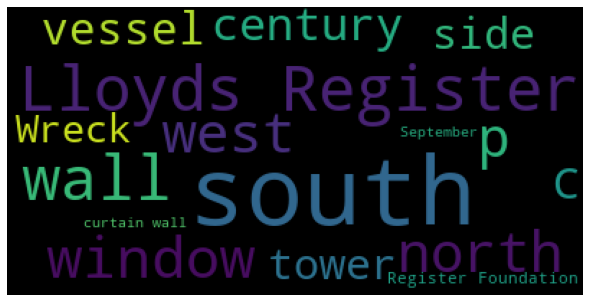

In [213]:
sent = (' ').join(data)
wordcloud = WordCloud(min_font_size = 10).generate(sent)
  
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [158]:
str(soup)

"Usk Castle is a substantial masonry castle dating from around 1138 and now generally ruinous.   It is first recorded in the possession of Richard de Clare in 1262, but probably held by the de Clare family from the conquest of South Wales. It subsequently passed through severeal hands in the fourteenth century and for a time was controlled by Edmund Mortimer, Earl of the Marches. After the death of his nephew Richard, the Duke of York, it passed to Edward VI, subsequently staying in the hands of the crown until the death of Henry VII. It then passed to the Earls of Pembroke.<br/>\n<br/>\nThe castle stands on a spur overlooking the Usk and consists of a rectangular area surrounded by curtain walls with towers at intervals and a large gatehouse on the east side. To the south-east is an outer bailey with walls on its south-east side, a corner tower on the south, and a gatehouse at the north end of the south-east wall.<br/>\n<br/>\nThe gatehouse is square in plan, a three storey structure 